In [2]:
#Importation de nos bibliothèques

import numpy as np
import scipy.signal as signal
from scipy.signal import butter, lfilter, freqz
from scipy.signal import butter,filtfilt
import wave
from scipy.io import wavfile
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from numpy.fft import fft
from scipy.fft import fft, fftfreq
from scipy import signal
from IPython.display import Audio
from ModulationPy import PSKModem, QAMModem

Signal Datatype: int16
Fréquence:  44100
Durée de la musique: 215.1 secondes


Text(0.5, 0, 'Temps (s)')

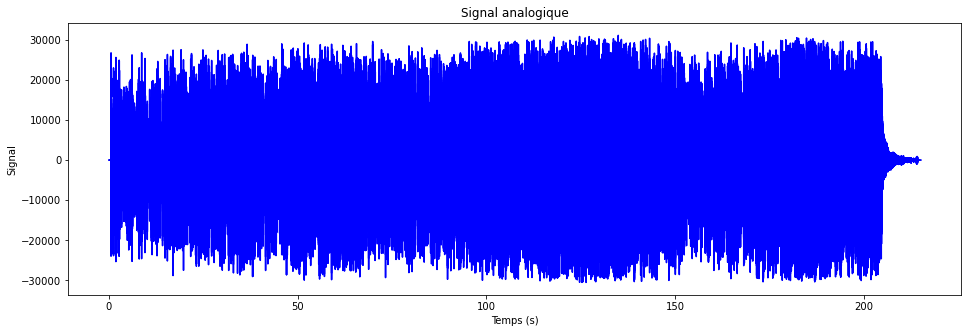

In [64]:
frequence ,signal = wavfile.read("DiegoLorenzini.wav")

print('Signal Datatype:', signal.dtype)
print("Fréquence: ",frequence)
durée = signal.shape[0] / frequence #durée du fichier audio en seconde = nb d'échantillon / fréquence 
print('Durée de la musique:', round(durée,1), 'secondes') 

temps = np.linspace(0, durée, signal.shape[0]) # <- Pour savoir quand est ce que chaque point est prélevé  

#On trace les valeurs du signal
plt.figure(figsize=(16, 5))
plt.plot(temps , signal ,color="blue")
plt.title("Signal analogique")
plt.ylabel('Signal')
plt.xlabel('Temps (s)')


Signal Datatype: int16
Fréquence:  44100
Durée de la musique: 215.1 secondes


Text(0.5, 0, 'Temps (s)')

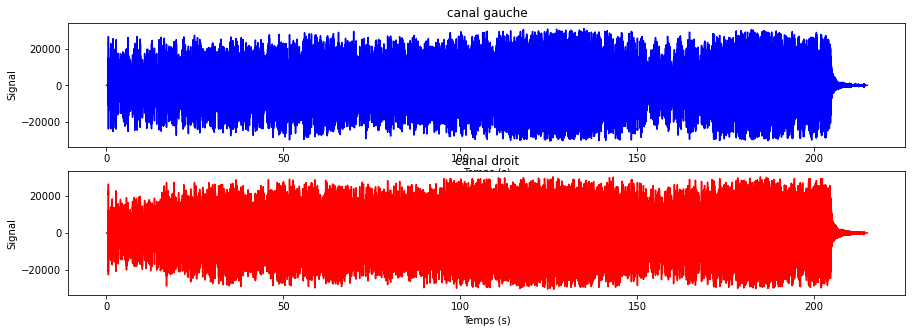

In [65]:
#En séparant les deux canaux
frequence ,signal = wavfile.read("DiegoLorenzini.wav")

print('Signal Datatype:', signal.dtype)
print("Fréquence: ",frequence)
durée = signal.shape[0] / frequence #durée du fichier audio en seconde = nb d'échantillon / fréquence 
print('Durée de la musique:', round(durée,1), 'secondes') 

temps = np.linspace(0, durée, signal.shape[0]) # <- Pour savoir quand est ce que chaque point est prélevé  

plt.figure(figsize=(15, 5))
plt.subplot(2,1,1)
plt.plot(temps , signal[:,0] ,color="blue")
plt.title("canal gauche")
plt.ylabel('Signal')
plt.xlabel('Temps (s)')

plt.subplot(2,1,2)
plt.plot(temps, signal[:,1], color="red")
plt.title("canal droit")
plt.ylabel('Signal')
plt.xlabel('Temps (s)')


In [66]:
def transform(signal,sr):
    ft=np.fft.fft(signal)
    mag=np.abs(ft)
    
    plt.figure(figsize=(15,5))
    
    frequency = np.linspace(0,sr,(len(mag)))
    plt.plot(frequency,mag)
    plt.xlabel('Fréquence')
    plt.title("Domaine fréquentielle")
    
    plt.show()

C:\Users\amaim\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


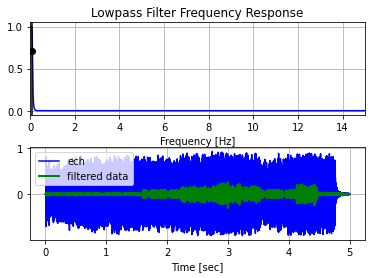

In [81]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Setting standard filter requirements.
order = 6
fs = 30.0       
cutoff = 0.1

b, a = butter_lowpass(cutoff, fs, order)

# Plotting the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

y = butter_lowpass_filter(ech, cutoff, fs, order)

T = 5.0         # value taken in seconds
n = ech.size # indicates total samples
t = np.linspace(0, T, n, endpoint=False)

plt.subplot(2, 1, 2)
plt.plot(t, ech, 'b-', label='ech')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

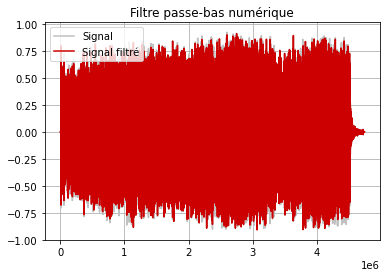

In [30]:
from scipy.signal import butter, sosfilt, sosfreqz
# Fréquence d'échantillonnage
fe = 1  # Hz

# Fréquence de nyquist
f_nyq = fe / 2.  # Hz

# Fréquence de coupure
fc = 0.09  # Hz

# Préparation du filtre de Butterworth en passe-bas
b, a = signal.butter(4, fc/f_nyq, 'low', analog=False)

# Application du filtre
s_but = signal.filtfilt(b, a, y)

# Affichage du signal filtré
plt.plot(ech, color='silver', label='Signal')
plt.plot(s_but, color='#cc0000', label='Signal filtré')
plt.grid(True, which='both')
plt.legend(loc="best")
plt.title("Filtre passe-bas numérique")
plt.show()

C:\Users\amaim\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


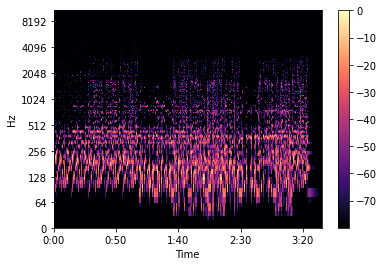

In [28]:
D = librosa.stft(y)

log_power = librosa.amplitude_to_db(D**2, ref = np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar();

C:\Users\amaim\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


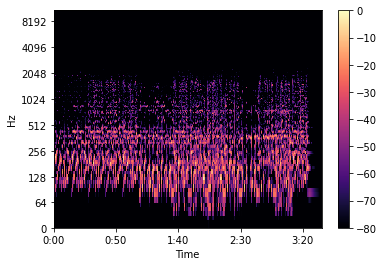

In [31]:
D = librosa.stft(s_but)

log_power = librosa.amplitude_to_db(D**2, ref = np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar();

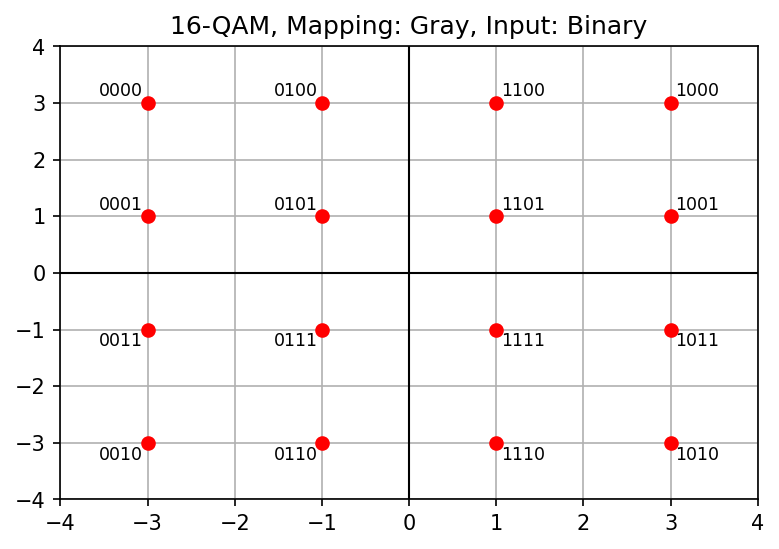

In [3]:
modem = QAMModem(16, 
                 bin_input=True,
                 soft_decision=False,
                 bin_output=True)
modem.plot_const()

In [4]:
msg = np.array([1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0]) # message d'entrée
modulation = modem.modulate(msg) # modulation -> Moduler un tableau de bits en symboles de constellation
print ( " Message modulé : \n " + str (modulation)+ "\n")

demodulation = modem.demodulate(modulation) #démodulation
print ( " Message démodulé : \n " + str (demodulation))

 Message modulé : 
 [ 1.-1.j  3.+1.j  1.-1.j -3.-3.j -3.-1.j  1.-3.j -1.-1.j  1.+3.j  1.+3.j
 -3.+1.j  3.+3.j -3.-1.j -3.-1.j -3.+3.j -1.-3.j -3.+3.j  1.-1.j  3.+1.j
  1.-1.j -3.-1.j -3.+1.j  1.-3.j -1.-1.j  1.+3.j  1.+3.j -3.+3.j -3.-1.j
 -3.-1.j -3.-1.j -3.+3.j -1.-3.j -3.+3.j  1.-1.j  3.+1.j  1.-1.j -3.-1.j
 -3.-1.j  1.-3.j -1.-1.j  1.+3.j]

 Message démodulé : 
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]


In [5]:
print(demodulation.shape)
print(msg.shape)
print(modulation.shape)

(160,)
(160,)
(40,)


In [6]:
#ici on veut s'assurer qu'il n'y a pas eu d'erreur dans la modulation et la démodulation
np.array_equal(msg, demodulation)#On regarde si le message de base est égal à ce qu'on a obtenu apres la demodulation

True

In [81]:
import commpy
from commpy.filters import rcosfilter
Ts = 0.00075
Fs= 1/Ts
alpha = 1/2
N =40
y = rcosfilter(N, alpha, Ts, Fs)
z = np.convolve(modulation , y, mode="same")

ModuleNotFoundError: No module named 'commpy'